In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/DATA.csv')
data=data.drop('Patient_ID',axis=1)
data.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,None,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(2)
memory usage: 586.1+ KB


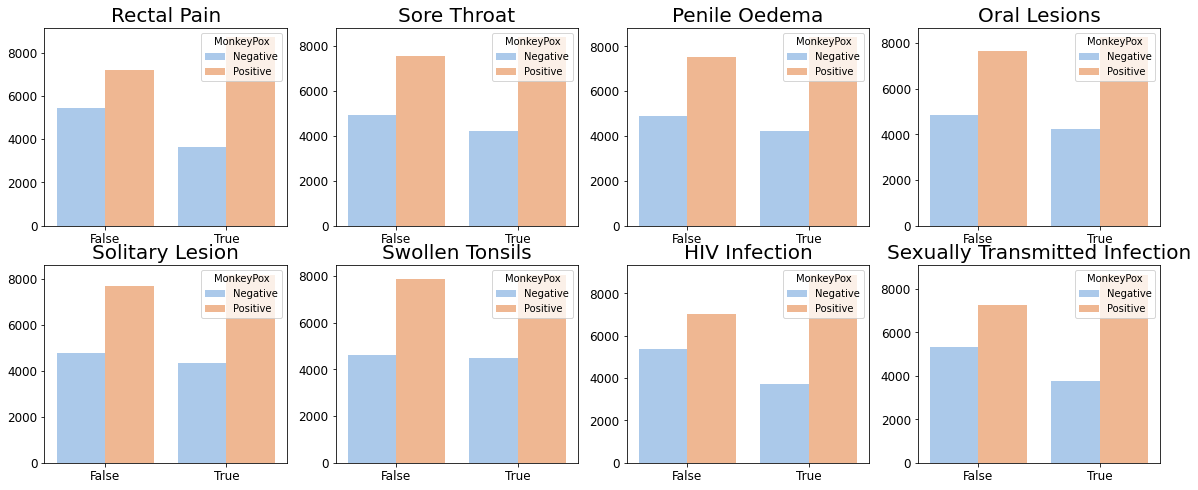

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
ax = ax.flatten()
palette = sns.color_palette('pastel')
for idx, feature in enumerate(data.columns.drop(['MonkeyPox', 'Systemic Illness'])):
    sns.countplot(x=feature, hue='MonkeyPox', data=data, palette=palette, ax=ax[idx])
    ax[idx].set_title(feature, fontsize=20)
    ax[idx].set(ylabel=None, xlabel=None)
    ax[idx].tick_params(axis='both', labelsize=12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Systemic Illness"]=le.fit_transform(data["Systemic Illness"])
data["MonkeyPox"]=le.fit_transform(data["MonkeyPox"])
data["Rectal Pain"]=le.fit_transform(data["Rectal Pain"])
data["Sore Throat"]=le.fit_transform(data["Sore Throat"])
data["Penile Oedema"]=le.fit_transform(data["Penile Oedema"])
data["Oral Lesions"]=le.fit_transform(data["Oral Lesions"])
data["Solitary Lesion"]=le.fit_transform(data["Solitary Lesion"])
data["Swollen Tonsils"]=le.fit_transform(data["Swollen Tonsils"])
data["HIV Infection"]=le.fit_transform(data["HIV Infection"])
data["Sexually Transmitted Infection"]=le.fit_transform(data["Sexually Transmitted Infection"])

In [ ]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(data,test_size=0.3,random_state=42)
print("Train set: ",len(trainset))
print("Test set: ",len(testset))

Train set:  17500
Test set:  7500


In [ ]:
trainfeatures=trainset.drop('MonkeyPox',axis=1)
trainlabel=trainset["MonkeyPox"].copy()


In [ ]:
testfeatures=testset.drop('MonkeyPox',axis=1)
testlabel=testset["MonkeyPox"].copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state = 1, max_depth = 8, min_samples_split = 100, min_samples_leaf = 5)
tree.fit(trainfeatures,trainlabel)
treepred=tree.predict(testfeatures)

In [ ]:
from sklearn.metrics import accuracy_score
print("Decision Tree model accuracy(in %):",accuracy_score(testlabel, treepred)*100)

Decision Tree model accuracy(in %): 69.26666666666667


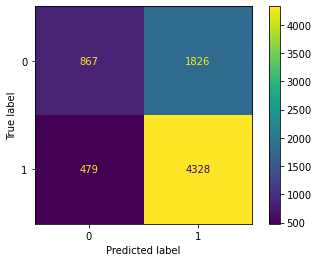

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
treecon=confusion_matrix(testlabel,treepred)
treedisp=ConfusionMatrixDisplay(treecon)
treedisp.plot()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(trainfeatures, trainlabel)

GaussianNB()

In [ ]:
gnbpred = gnb.predict(testfeatures)

In [ ]:
from sklearn.metrics import accuracy_score
print("naive bayes model accuracy(in %):",accuracy_score(testlabel, gnbpred)*100)

naive bayes model accuracy(in %): 68.65333333333334


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(trainfeatures,trainlabel)

lr_pred = lr_model.predict(testfeatures)
print("Logistic Regression accuracy(in %):",accuracy_score(testlabel, lr_pred)*100)

Logistic Regression accuracy(in %): 66.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(random_state = 1, max_depth = 15,n_estimators = 600, min_samples_split = 100, min_samples_leaf = 5)
rnd.fit(trainfeatures,trainlabel)

rndpred=rnd.predict(testfeatures)
print("Random Forest model accuracy(in %):",accuracy_score(testlabel, rndpred)*100)

Random Forest model accuracy(in %): 69.86666666666666


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.constraints import max_norm

In [ ]:
model = Sequential()




model.add(Dense(9,  input_shape=[trainfeatures.shape[1]],activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=testfeatures,
          y=testlabel,
          epochs=25,
          batch_size=256,
          validation_data=(testfeatures,testlabel ),
          )

Epoch 1/25
30/30 [==============================] - 1s 11ms/step - loss: 0.7009 - val_loss: 0.6630
Epoch 2/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6621 - val_loss: 0.6509
Epoch 3/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6545 - val_loss: 0.6486
Epoch 4/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6512 - val_loss: 0.6459
Epoch 5/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6499 - val_loss: 0.6441
Epoch 6/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6501 - val_loss: 0.6423
Epoch 7/25
30/30 [==============================] - 0s 6ms/step - loss: 0.6465 - val_loss: 0.6398
Epoch 8/25
30/30 [==============================] - 0s 4ms/step - loss: 0.6426 - val_loss: 0.6360
Epoch 9/25
30/30 [==============================] - 0s 5ms/step - loss: 0.6417 - val_loss: 0.6331
Epoch 10/25
30/30 [==============================] - 0s 4ms/step - loss: 0.6362 - val_loss: 0.6305
Epoch 11/25
30/30 

In [ ]:
losses = pd.DataFrame(model.history.history)

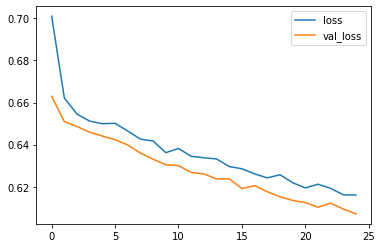

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

In [ ]:
prediction = model.predict(testfeatures)

235/235 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import RocCurveDisplay

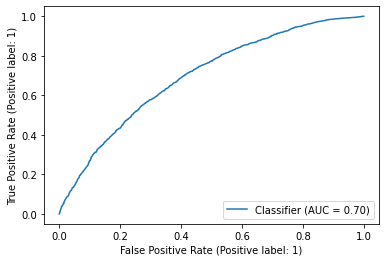

In [ ]:
RocCurveDisplay.from_predictions(testlabel,prediction,sample_weight=None)